# Analysis of Professional Chess Players and Games
   <i> Data sourced from chessgames.com </i>

## <u>Executive Summary</u>

<a href="chessgames.com">Chessgames.com</a> is one of the most comprehensive database of chess games which contains the earliest known recorded games and is updated with games from the current top-level tournaments. Using the said database, this study aims to analyze the profile of professional chess players and understand the metagame dictated by the top 25 rated players. As of the time of this study, the database contains over 917,000 professional chess games. A total of 9,814 professional chess players' information were scraped from the website to analyze the demographics of the players and the top 25 players' games were then scraped to understand the metagame of high-level chess games. All in all, there is a total of 57,131 high-level chess games scraped from the website and was used for the analysis.

Results of the analysis showed that majority of chessgame players were middle-aged player with at most 20 years of experience. For the top rated players, majority of them uses B90 Sicilian, Nadjdorf as their opening move and are frequently held at World Blitz Champioonship. 


## <u>Problem Statement</u>

It is of interest to know the demographics of professional chess players by age, country of origin, playing years, number of games played and rating. Also, using the information on the games played by the top 25 rated players, the most common opening move in every winning game can be analyzed might help chess enthusiasts and aspiring pro chess players to improve faster by having better insights about the game.

## <u>Data Description</u>

<a href="chessgames.com"> Chessgames.com </a> is a database of chess games combined with discussion forums, forming the internet's oldest and best chess learning community." </center>

The website contains an aggregated player database which includes each player's games throughout his/her career.
For the purposes of this analysis, the following data were scraped for each player:

- Player Name
- Highest Rating Obtained
- Playing Years
- No. of Games
- Age
- Country

To understand the metagame of the highest rated players, the games database of the top 25 rated players were scraped.

The games database contain the following information:

- Game <font size="1"> (White Player Name vs Black Player Name) </font>
- Result <font size="1"> (White Score - Black Score) </font>
- Moves
- Year
- Event/Locale
- Opening
    
The scraped data post-cleaning were then saved to a sqlite database named `dmwlab2_.db` containing two (2) tables:
1. `table4` - contains the player database
2. `table3` - contains the games database

#### <i>Web Scraping</i>

Scraping was done by using the `requests` function to connect to <a href="chessgames.com"> chessgames.com </a>. After which, HTML elements were inspected from the website to scrape the necessary information using BeautifulSoup.

## <u>Methodology</u>
#### <i>Data Scraping, Processing and Database Creation</i>

Click `Show Code` to see the source code.

In [1]:
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

In [3]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import psycopg2
import os
import time
import seaborn as sns
import re
import requests
import string
import cufflinks
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
from math import ceil
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from collections import Counter
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

##### Step 1. Setting up a proxy

In [209]:
# #Setting up a proxy
# os.environ['HTTP_PROXY'] = 'http://157.230.57.151'

##### Step 2. Creating a connection to the database dmwlab2_.db

In [4]:
conn = sqlite3.connect('dmwlab2_.db')
c = conn.cursor()

##### Step 3. Scraping the player database

In [ ]:
# # Getting the player database [Rating, No. of Games, Name, Year, Age, Country, Link]

# final_table = pd.DataFrame()
# list_playerid = []
# age_list = []
# country_list = []

# for letter in string.ascii_uppercase:  # Iterating over the alphabet
#     url = 'http://www.chessgames.com/directory/' + letter + '.html'
#     resp = requests.get(url)
#     t = np.random.choice([1, 2, 3, 4, 5], 1, replace=True)
#     time.sleep(t)
#     rsp_soup = BeautifulSoup(resp.text, 'lxml')

#     player_info = rsp_soup.select('center > table')  # Getting the tables
#     player_table1 = pd.read_html(str(player_info), skiprows=1)[0].dropna(
#         axis=1, how='all')  # Saving player_table1 to a dataframe
#     player_table2 = pd.read_html(str(player_info), skiprows=1)[1].dropna(
#         axis=1, how='all')  # Saving player_table2 to a dataframe

#     # Merging both player_tables per page
#     player_table = pd.concat(
#         [player_table1, player_table2], axis=0, ignore_index=True)

#     # Getting player ids/u
#     for i in range(len(player_table)):
#         list_playerid.append(rsp_soup.select(
#             'a[href^="/perl/chessplayer?"]')[i]['href'])

#     # Merging all tables from A-Z
#     final_table = final_table.append(player_table, ignore_index=True)

# for pid in list_playerid:
#     url2 = 'http://www.chessgames.com/' + pid
#     resp2 = requests.get(url2)
#     t = np.random.choice([1, 2], 1, replace=True)
#     time.sleep(t)
#     rsp_soup2 = BeautifulSoup(resp2.text, 'lxml')

#     try:
#         age_country = rsp_soup2.select(
#         'td[background="/chessimages/highlight_stripes.gif"]>font>font'\
#             '[size="-2"]')[0].text

#         if len(re.findall(r', (\d{2})', age_country)) == 1:
#             age_list.append(int(re.findall(r', (\d{2})', age_country)[0]))
#         else:
#             age_list.append(None)
#     except:
#         age_list.append(None)
        
#     try:
#         if len(re.findall(r'\) (\w+)', age_country)) == 1:
#             country_list.append(re.findall(r'\) (\w+)', age_country)[0])
#         else:
#             country_list.append(None)
#     except:
#         country_list.append(None)

# # Renaming final_table columns
# final_table = final_table.rename(
#     columns={0: 'Rating', 2: 'Player Name', 3: 'Year', 4: 'No. of Games'})

# # Appending Player ID, Age and Country columns to final_table
# final_table['Player ID'] = list_playerid
# final_table['Age'] = age_list
# final_table['Country'] = country_list

##### Step 3a. Saving players database to dmwlab2_.db

In [ ]:
#final_table.to_sql('table1', conn, if_exists='replace', index=False)

##### Step 4. Selecting the top 25 rated players from the player database

In [22]:
# query_table = pd.read_sql('SELECT * FROM table1 ORDER BY Rating DESC LIMIT 25', conn)

##### Step 5. Scraping the games database of the top 25 players

In [8]:
# # Getting the games database of the top 25 players

# top_player_table = pd.DataFrame()

# for i in range(len(query_table)):  # Iterating over each player
#     pages = ceil(query_table.iloc[i, 3]/25)  # Getting the no. of pages
#     # Getting the player_id
#     p_id = re.findall(r'\d+', query_table.iloc[i, 4])[0]

#     for page in range(1, pages+1):  # Iterating over each page of games
#         url3 = 'http://www.chessgames.com/perl/chess.pl?page=' + \
#             str(page) + '&pid=' + p_id
#         resp3 = requests.get(url3)
#         t = np.random.choice([1, 2], 1, replace=True)
#         time.sleep(t)
#         rsp_soup3 = BeautifulSoup(resp3.text, 'lxml')

#         page_table = rsp_soup3.select('table[cellpadding="3"]')
#         p_sub_table = pd.read_html(str(page_table), header=0)[
#             0].dropna(how='all', axis=1)
        
#         top_player_table = top_player_table.append(
#             p_sub_table, ignore_index=True)


##### Step 5a. Saving games database to dmwlab2_.db

In [ ]:
#top_player_table.to_sql('table2', conn, if_exists='replace', index=False)

##### Step 6. Final cleaning of databases

In [63]:
# #Separating Opening to First Move and Style
# top_player_table['First Move'] = [re.findall(r'(\w\d{2}) ', 
#     top_player_table.iloc[i, 5])[0] for i in range(len(top_player_table))]
# top_player_table['Style'] = [re.findall(
#     r'\w\d{2} (.*)?', top_player_table.iloc[i, 5])[0] 
#                              for i in range(len(top_player_table))]

# #Separating Game to White Player vs Black Player
# top_player_table['White Player'] = [re.findall(
#     '[\d]+.\\xa0(.+) vs (.+)', top_player_table.iloc[i, 0])[0][0] 
#                                     for i in range(len(top_player_table))]
# top_player_table['Black Player'] = [re.findall(
#     '[\d]+.\\xa0(.+) vs (.+)', top_player_table.iloc[i, 0])[0][1] 
#                                     for i in range(len(top_player_table))]

# #Rearranging the column names
# top_player_table2 = top_player_table[['White Player', 'Black Player',
#             'Result', 'Moves', 'Year', 'Event/Locale', 'First Move', 'Style']]
# #top_player_table2.to_sql('table3', conn, if_exists='replace', index=False)

In [67]:
# for i in range(len(table1)):
#     if table1.iloc[i, 8] == '':
#         table1.iloc[i, 8] = 2019
        
# table1['End Year'] = [re.findall(
#     '(\d{4})-?(\d{4})?', table1.iloc[i, 2])[0][1] for i in range(len(table1))]
# table1['Years of Experience'] = [
#     int(i) for i in table1['End Year']]-table1['Start Year']

# table4 = table1[['Player Name', 'Age', 'Country', 'Player ID',
#                  'No. of Games', 'Years of Experience', 'Year', 'Rating']]
# #table4.to_sql('table4', conn, if_exists='replace', index=False)

# <u>Results and Discussion</u>

### Exploratory Data Analysis of Player Profile

#### <i>Age Distribution</i>

In [6]:
# Distribution of Chess Players by Age
age = pd.read_sql('SELECT age FROM table4 WHERE age <> ""', conn)
age.iplot(kind='hist', xTitle='Age',
                            yTitle='Count',
                            title='Distribution of Chess Players by Age')

<b> Age Distribution Summary Statistics </b>

In [7]:
age.describe()

,Age
count,8349.000000
mean,48.738651
std,18.611285
min,10.000000
25%,33.000000
50%,47.000000
75%,62.000000
max,99.000000


Results of the study showed that the average age of all chessplayers in the database is 49 years old and it ranges from 10 to 99 years old. This would possibly mean that the distribution of chessplayers is not limited only to middle-aged people. This sport has been popular at any ages, even to young or old ones. Also, it can be seen from the figure that the age distribution appears to be bimodal thus, potentially, there are two (2) groups of chess players. The reason for the decrease in players after the first mode of 32 is unknown, but there seems to be a resurgence of chess players at age 54. In addition, 25% of the players are aged 33 and below, while the 75th percentile is at age 67.

##### Years of Experience

In [8]:
years_experience = pd.read_sql('''Select [years of experience] from table4
                            where [years of experience] <> "None" and
                            [years of experience] < 80
                            ''', conn)
years_experience.iplot(kind='hist', xTitle='Years of Experience',
                            yTitle='Count',
                            title='Distribution of Chess Players by Years of Experience')

<b> Years of Experience Summary Statistics </b>

In [9]:
years_experience.describe()

,Years of Experience
count,9807.000000
mean,20.501173
std,13.286945
min,1.000000
25%,10.000000
50%,18.000000
75%,28.000000
max,77.000000


Majority of the professional chess players have a career span for about 0 to 30 years with an average of 20 years in the chess industry. However, it can be seen that only few of the players have reached longer years in playing chess with a maximum of 77 years in the industry.

##### Distribution of Players by Country

In [10]:
# Distribution of Players by Country
country = pd.read_sql('''SELECT COUNT(*) AS count, country
                            FROM table4
                            WHERE country <> "None" AND country <> 'United'
                            GROUP BY country
                            ORDER BY count DESC LIMIT 10''', conn)

country.iplot(x='Country', y='count', kind='bar', xTitle='Country', 
                            yTitle='Count', 
                            title='Distribution of Players by Country')

<font size="1.5"><i>*Top 10 countries with most players. Zoom in the plot to have a better look at the differences between distribution of players by country.</i></font>

Looking at the distribution of players by country, Russia tops the number of professional players, followed by Germany, the Netherlands, Yugoslavia, and Ukraine. It is notable that these countries are European countries.

Taking a deeper look at the culture of chess in Russia, an <a href="https://slate.com/news-and-politics/2009/09/how-did-russians-get-so-good-at-chess.html">article</a> from `slate.com` wonderfully explains how chess became so popular in the region. To quote: <br>
<br>
<i><center>"The Soviets subsidized the game. Chess has long been popular in Russia. After the Bolsheviks took power in 1917, it became a national pastime. Soon after the revolution, Vladimir Lenin’s supreme commander of the Soviet army, Nikolay Krylenko, laid the foundations for state-sponsored chess: He opened chess schools, hosted tournaments, and promoted the game as a vehicle for international dominance. Chess was a natural fit for the Soviet Union. For one thing, many of its thinkers and leaders were avid chess players. The Soviets also saw chess as embodying their revolutionary ideals. It was a game of skill, and the USSR prided itself on its intellectual talents."</center></i>

##### Average Rating of Players per Country

In [11]:
rating_country = pd.read_sql('''SELECT AVG(rating) as Avg_rating, count(*) 
                                        as count_player, Country 
                                        FROM table4
                                        WHERE country <> "None"
                                        GROUP BY country
                                        HAVING count_player > 100
                                        ORDER BY avg_rating DESC
                                        LIMIT 10''', conn)

rating_country[::-1].iplot(x='Country', y='Avg_rating', kind='barh',
                                        yTitle='Country',
                                        xTitle='Rating',
                                        sortbars='False',
                                        title='Top 10 Countries by Rating')

<font size="1.5"><i>*For countries having 100 or more players. Zoom in the plot to have a better look at the differences between player ratings.</i></font>

Looking at the top 10 countries by rating, the notable countries are Russia, Yugoslavia, Ukraine, Hungary, and India. These countries are notable because despite their high number of players, they still garnered the highest average ratings. Thus, we can say that these countries' players are relatively better than most countries. Among the five countries mentioned, four (4) of them with the exception of India are European countries. An interesting fact about India, as mentioned by the same <a href="https://slate.com/news-and-politics/2009/09/how-did-russians-get-so-good-at-chess.html">article</a> from `slate.com`, is that chess originally came to Russia along trade routes from Persia and India.

##### Understanding the Rating by No. of Games

Would there be an increase in Rating as the No. of Games of a player increases?

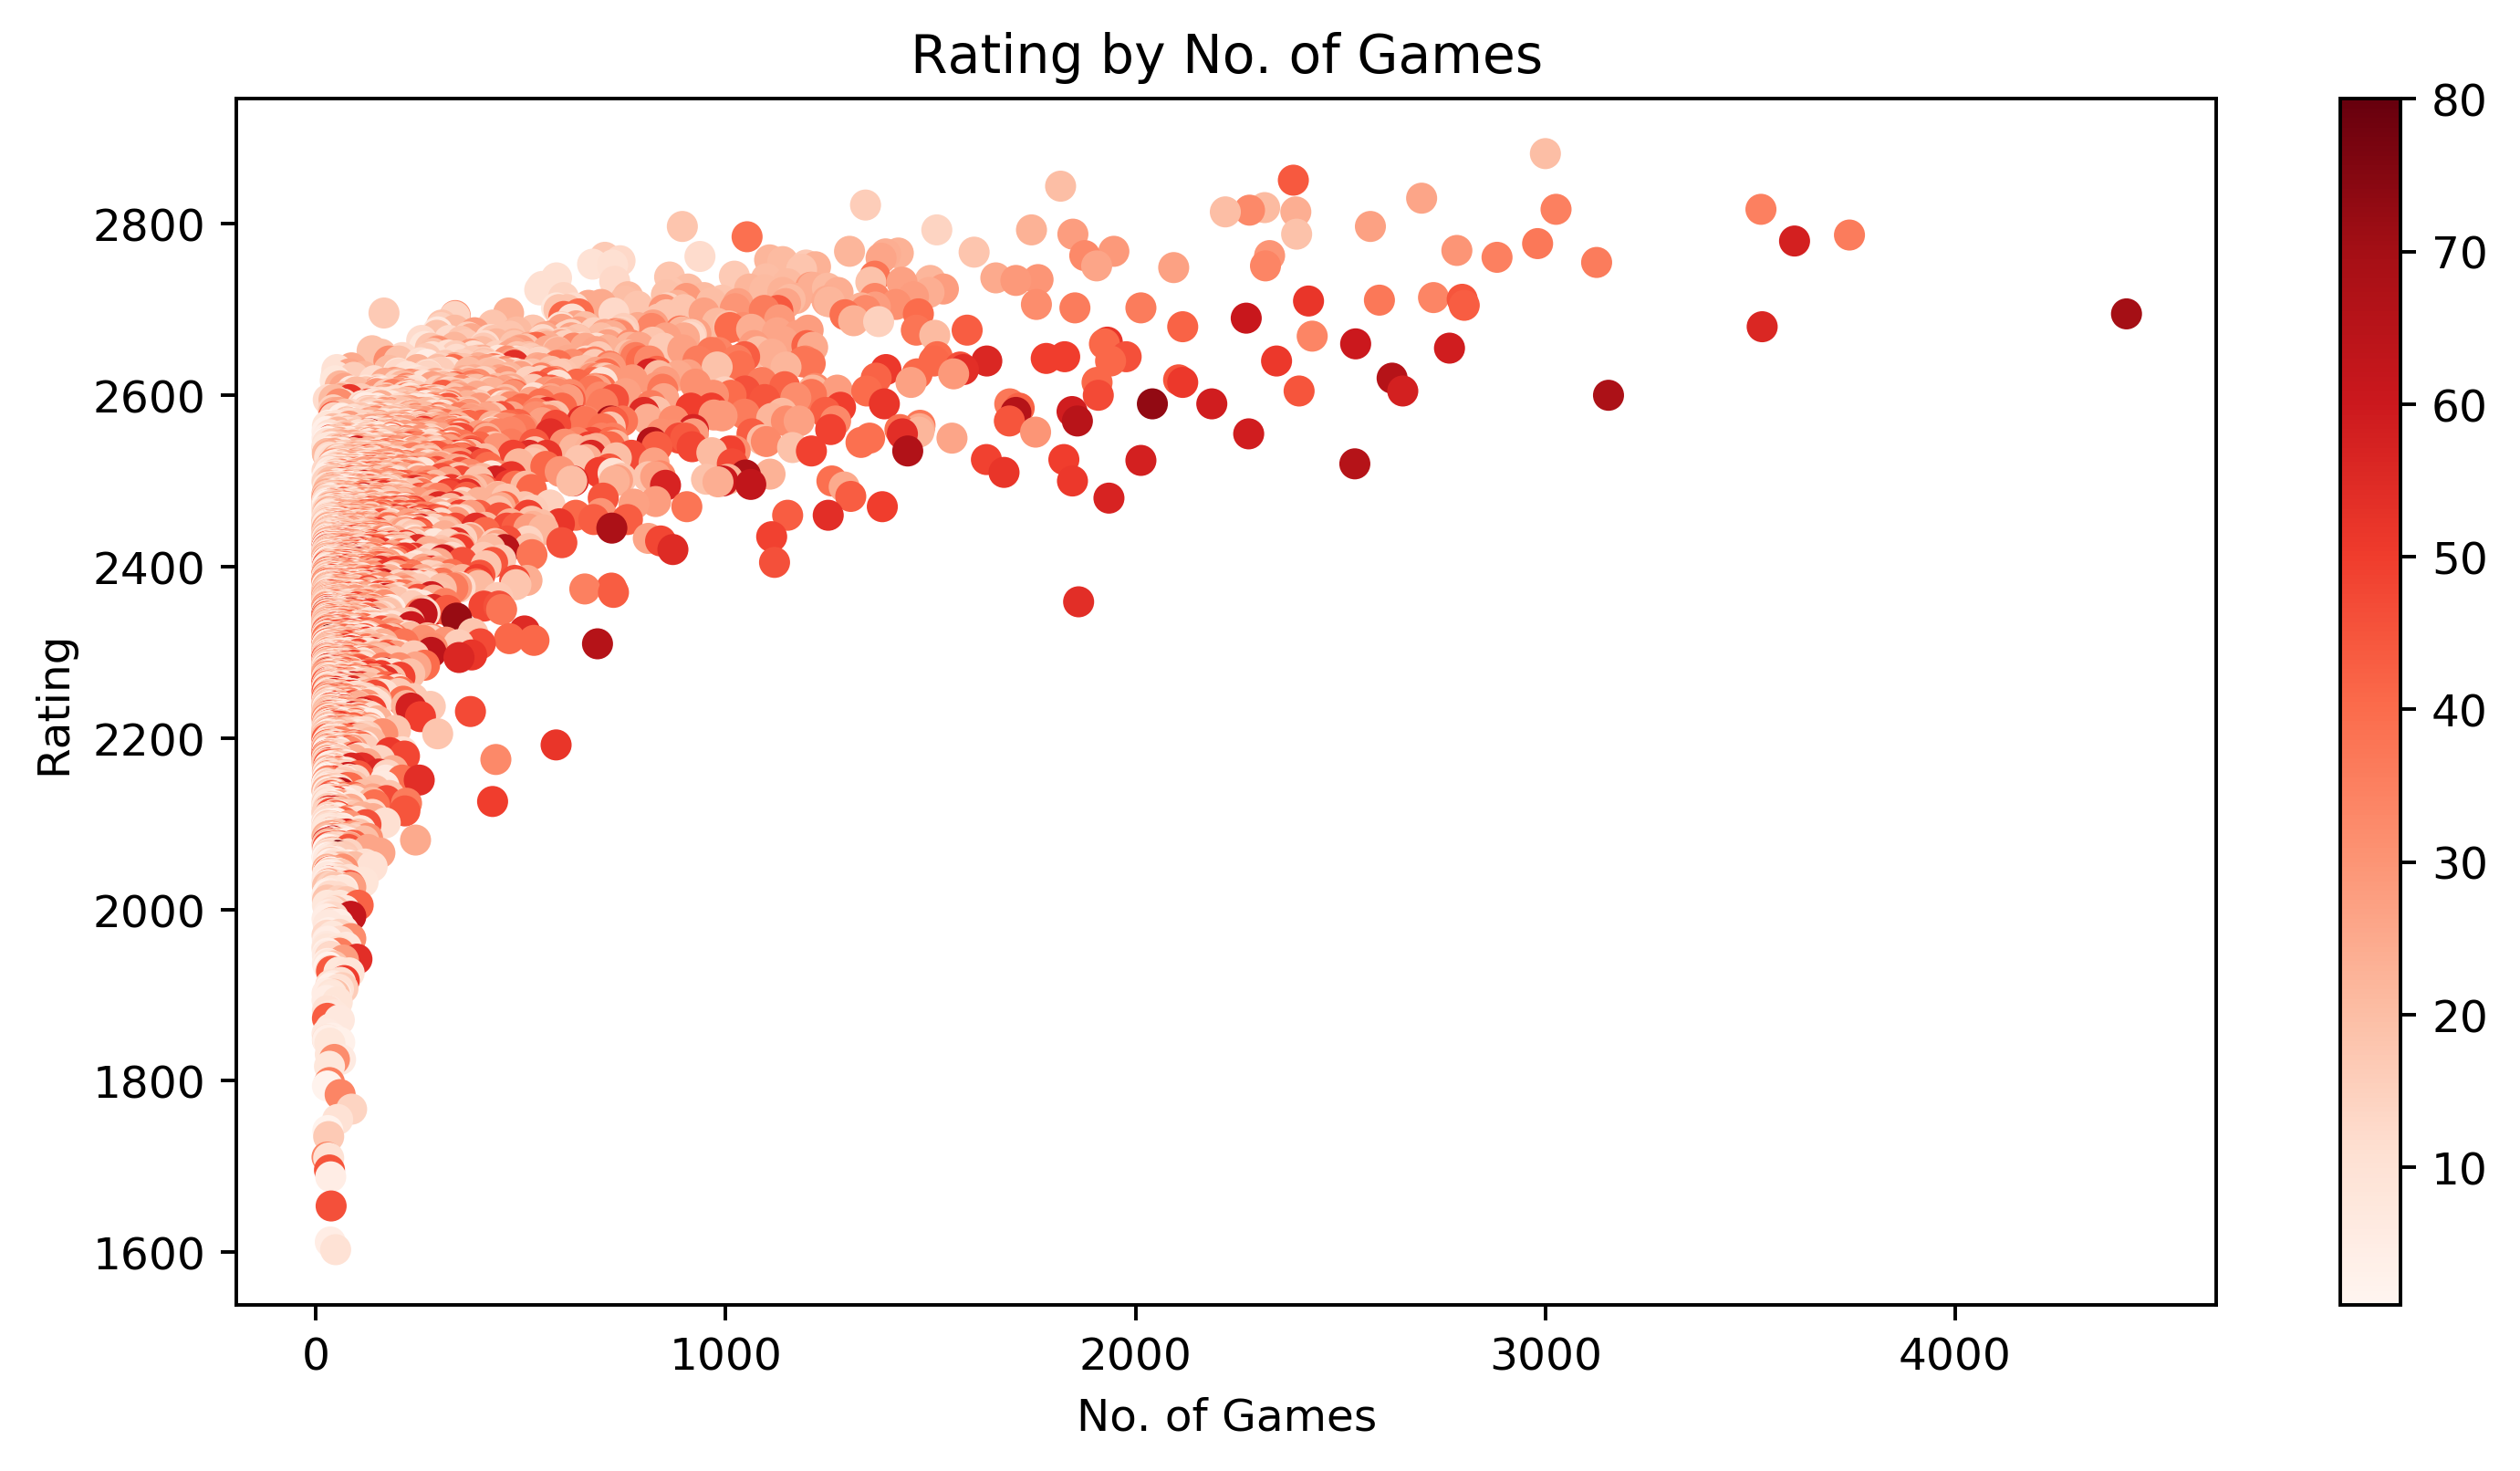

In [12]:
corr_rgy = pd.read_sql('''SELECT age, rating, [No. of Games], [Years of Experience]
        FROM table4 WHERE age > 15 ORDER BY rating DESC''', conn)

plt.figure(dpi=350, figsize=(10,5))
plt.scatter(y='Rating', x='No. of Games', c='Years of Experience', data=corr_rgy, cmap='Reds', vmax=80, vmin=1)
plt.colorbar()
plt.xlabel('No. of Games')
plt.ylabel('Rating')
plt.title('Rating by No. of Games');

In [13]:
print('Rating vs No. of Games Correlation:', corr_rgy['Rating'].corr(corr_rgy['No. of Games']))

Rating vs No. of Games Correlation: 0.4915781222817302


There is a moderate correlation between the number of games played by a player and its rating. So it is not necessarily true that playing more games will guarantee a higher rating.

##### Understanding the No. of Games by Years of Experience

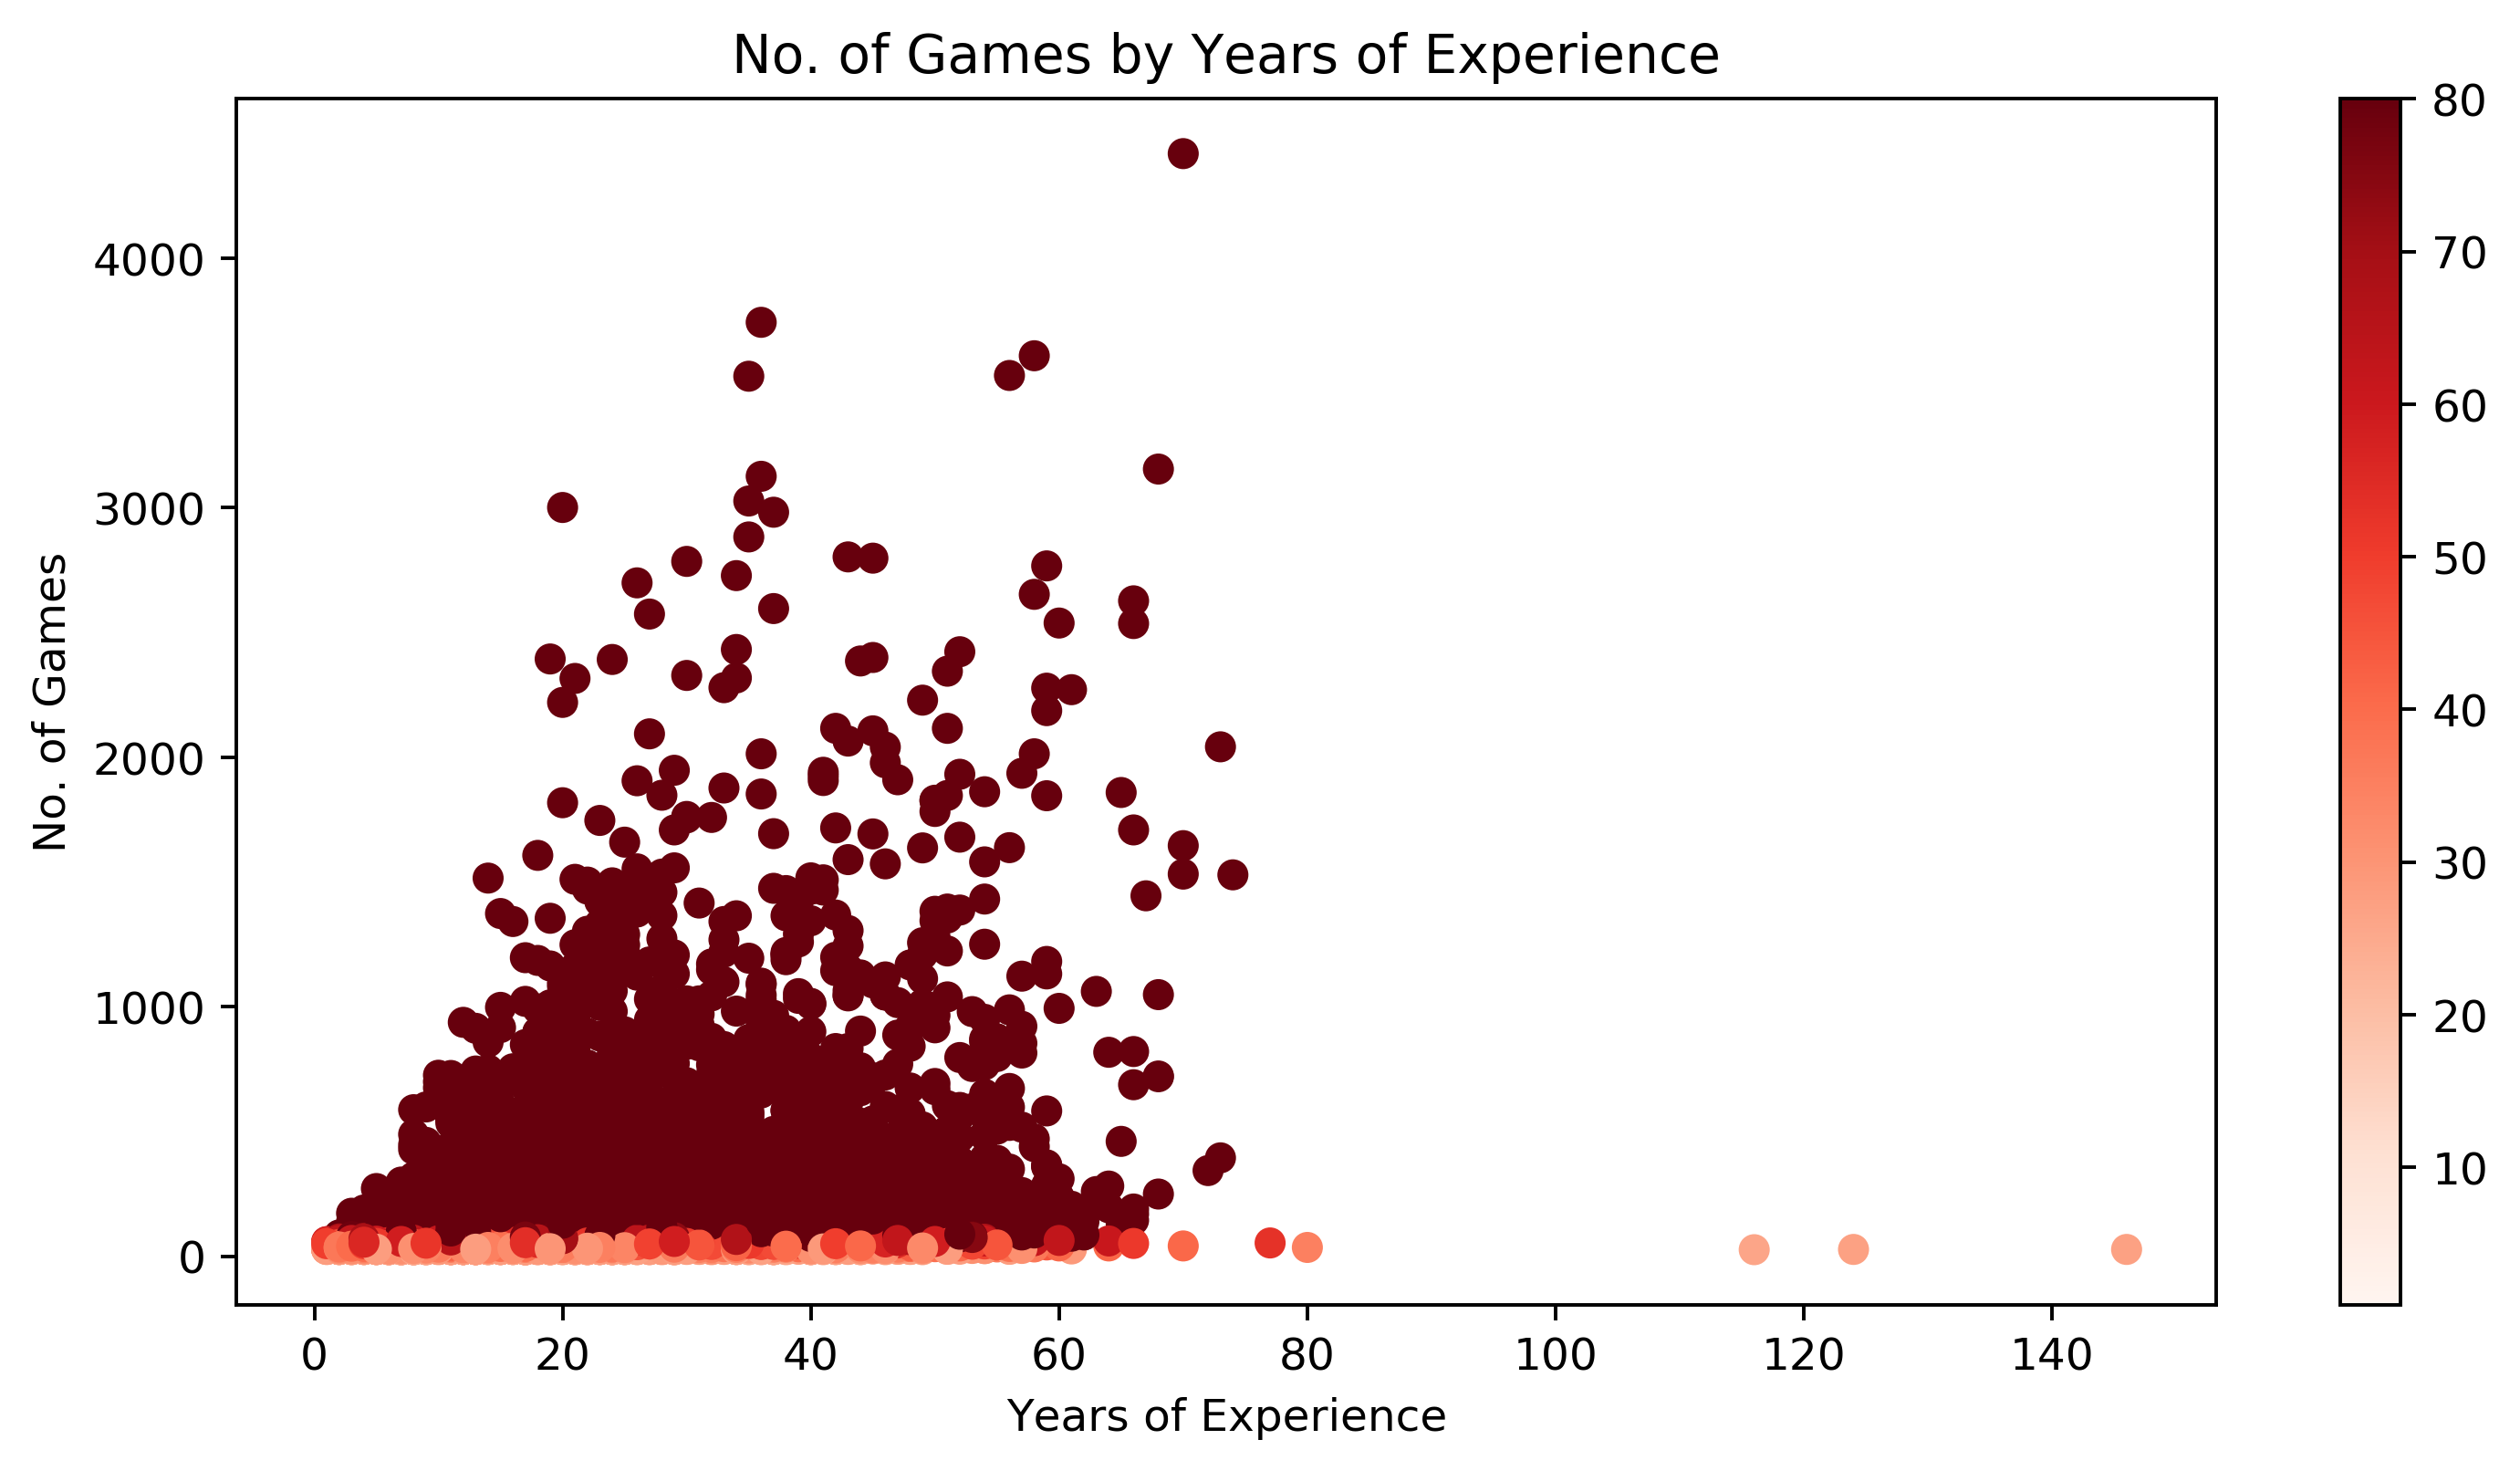

In [14]:
plt.figure(dpi=350, figsize=(10,5))
plt.scatter(x='Years of Experience', c='No. of Games', y='No. of Games', data=corr_rgy, cmap='Reds', vmax=80, vmin=1)
plt.colorbar()
plt.ylabel('No. of Games')
plt.xlabel('Years of Experience')
plt.title('No. of Games by Years of Experience');

In [15]:
print('No. of Games vs Years of Experience correlation:', corr_rgy['No. of Games'].corr(corr_rgy['Years of Experience']))

No. of Games vs Years of Experience correlation: 0.29244369401409903


The correlation for No. of Games vs Year of Experience is weak. Thus having a longer career does not necessarily mean that a player plays more games. It might be that most players play less games per year during their career.

### Metagame Analysis of the Top 25 Chess Players

Metagame is defined as the highest level of strategy in complex games. It refers to any aspect of strategy that involves thinking about what your opponent is thinking you are thinking. It is often evident in highly competitive games such as DotA 2 and in this case, chess.

Due to the nature of the learning curve of a player, eventually a player's skill level caps. In this event, two (2) highly rated players are aware of each and every strategy available in the game. Thus, the game's outcome becomes less dependent on actual strategy. To compensate, the strategy of the mind or mind games, attributable to the metagame comes into play.

By analyzing the metagame of the top 25 professional chess players, we aim to understand the playstyle of those who lead the competition. For chess enthusiasts and aspiring pro players alike, it would be valuable as a comparison to their current playstyle.

##### Top 25 Chess Players by Rating

Getting the top 25 chess players by rating for analysis.

In [16]:
#Plotting the top 25 chess players by rating
top_25players = pd.read_sql('''SELECT [Player Name], country, [no. of games], [years of experience], rating
            FROM table4
            ORDER BY rating DESC
            LIMIT 25''', conn)
top_25players.iplot(x='Player Name', y='Rating', kind='bar')

<font size="1.5"><i>*Zoom in the plot to have a better look at the differences between player ratings.</i></font>

After which, we then take a look at the following characteristics.

##### Number of Games Across Years

A total of <b>57,131 games</b> were scraped from the top 25 players. The scraped games were used in this portion of the analysis.

In [17]:
#Number of Games across years
year_ngame = pd.read_sql('''SELECT count(*) as count, year FROM table3 
            WHERE year < 2019
            GROUP BY year''', conn)
year_ngame.iplot(y='count', x='Year',
                xTitle='Year',
                yTitle='Count',
                title='Number of Games across Years')

High level chess games is alive and well. Number of games recorded played by the top 25 rated players generally increased through the years.

##### Distribution of Game Results

In [18]:
#Distribution of Game Results
result_count = pd.read_sql('''SELECT count(*) as count, result FROM table3
            WHERE result <> "None"
            GROUP BY result''', conn)
result_count.iplot(x='Result', y='count', kind='bar',
                xTitle='Result',
                yTitle='Count',
                title='Distribution of Game Results')

<b>LEGEND:</b> <br>
`0-1` - Black wins <br>
`1-0` - White wins <br>
`1/2-1/2` - Draw 

We see that most high level games result to a draw. There were more White player wins than Black players for high-level chess games. Exploring it further below, we take the win percentage distribution.

##### Win Percentage Distribution

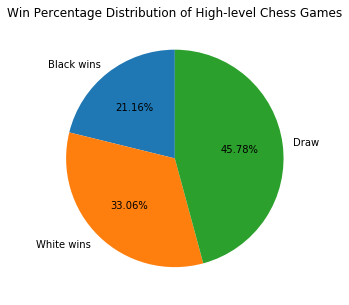

In [19]:
#Calculating win percentages
zero_one = result_count.iloc[0,0]/result_count['count'].sum()
one_zero = result_count.iloc[1,0]/result_count['count'].sum()
draw = result_count.iloc[2,0]/result_count['count'].sum()

#Plotting
plt.figure(figsize=(10,5))
plt.pie([zero_one, one_zero, draw], labels=['Black wins', 'White wins', 'Draw'], autopct=(lambda x: str(
    round(x, 2)) + '%'), startangle=90)
plt.title('Win Percentage Distribution of High-level Chess Games');

From the distribution of 57,131 games, we get the win percentage distribution. 46% of the time the games result to a draw. This may be attributed to the fact that most of these players are highly skilled and evenly matched.

Additionally, the win rate for white players is 12% more than the win rate for black players.

`White win rate = 33%`
`Black win rate = 21%`

In the game of chess, the white player always makes the first move. Does this mean that top players are better when they make the opening move and style? If so, what is the most used opening move and style of these players?

##### Most Used Opening Move

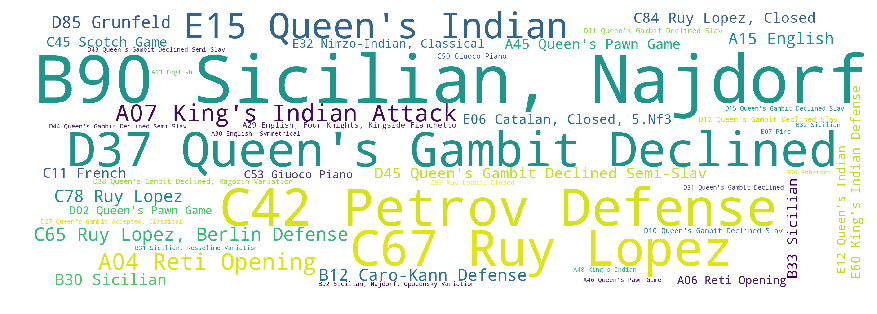

In [20]:
player_table = pd.read_sql('''SELECT Opening, [Event/Locale]
                           FROM table3''', conn)

c0_wc = WordCloud(background_color='white', width=2700,
                     height=900, relative_scaling=0.7,max_font_size=500,
                     min_font_size=20, max_words=2000,).\
        generate_from_frequencies(Counter(player_table['Opening'].to_list()))

plt.figure(figsize=(15,12))
plt.imshow(c0_wc)
plt.axis('off')
plt.show()

Top professional chess players prefer to use B90 Sicilian, Najdorf as their opening move. Unsuprisingly, it is regarded by the chess community as one of the most respected and deeply studied of all chess openings. The opening is named after the Polish-Argentine grandmaster Miguel Najdorf. Many players have lived by the Najdorf such as Garry Kasparov (\*ranked 2nd overall) and Bobby Fischer (\*ranked 19th overall). <br>
<font size="1.5"><i>*See Top 25 Chess Players by Rating</i></font>

##### Most Popular Event/Locale

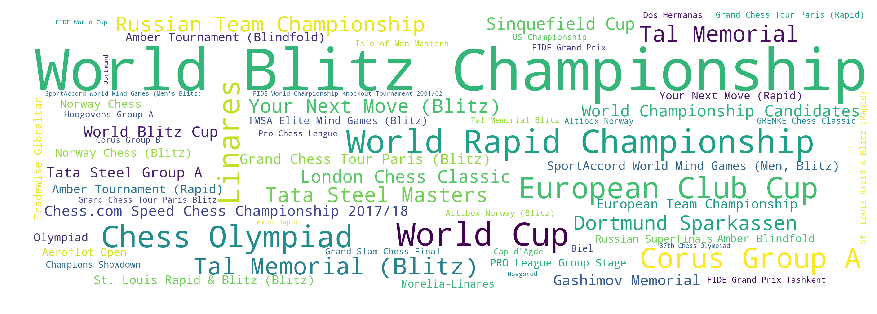

In [21]:
#Most popular event/locale 
c0_wc = WordCloud(background_color='white', width=2700,
                     height=900, relative_scaling=0.7,max_font_size=500,
                     min_font_size=20).generate_from_frequencies(
    Counter(player_table['Event/Locale'].to_list()))

plt.figure(figsize=(15,12))
plt.imshow(c0_wc)
plt.axis('off')
plt.show()

The tournament with the most number of games played by the top 25 rated players is the World Blitz Championship. Notably, the current world blitz champion is Magnus Carlsen (\*ranked 1st overall). <br>
<font size="1.5"><i>*See Top 25 Chess Players by Rating</i></font>

# Conclusion

Chessgames.com provide a comprehensive overview of the profile of the players as well as some of the metagame that might be useful for aspiring pro-chessgame players. 

After having some exploratory data analysis, it was found out that this type of sport does not choose any age, and it does not gurantee that the longer you played chess, the higher rating you might have. So anyone with an interest in playing chess might soon be included in the top rated players in the database. However, having many number of games played might be an advantage as this may give them insights and techniques as to how they would play against any other professional chessplayer. Also, this game has been popular nowadays as there is an observed rapid increase in the field of playing chessgames starting from 1990 to the present so there would surely be a thirst of knowledge on how to win the game.

As for the metagame of the top 25 most rated players, it was found out that B90 Sicilian, Nadjdorf is the most famous opening move with 33.06% chance of winning which is followed by C42 Petrov Defense. The most famous event/locale where the top rated players usually play is the World Blitz Championship where majority of the games were turned out to be draw since it is given that players playing in these kind of events are already pros.


# References and Acknowledgment
1. Data scraped from <a href="chessgames.com">chessgames.com</a>
2. https://slate.com/news-and-politics/2009/09/how-did-russians-get-so-good-at-chess.html
3. https://www.cleanchess.com/najdorf-variation-b90-99.html
4. https://en.wikipedia.org/wiki/World_Blitz_Chess_Championship
5. Asian Institute of Management's (AIM) ACCesS Lab for Jojie
6. Data Mining and Wrangling Lectures and Notebooks provided by Professor Christian Alis
7. Theme Extraction and Clustering of Boardgames by Accever Mendoza and Patricia Manasan of MSDS 2019
